THINGS TO NOTE<br>
1. Imported dataset is called **DATA**
2. The dataset intended for use for post-processing tasks is called **df**

INITIAL MODULE IMPORT

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

DATA PREPROCESSING - IMPORT, DATA SIZE OVERVIEW

In [2]:
data = pd.read_csv('mentalhealth_dataset.csv') #Read dataset CSV
print(len(data))
print("----------")
print(data.dtypes) #View types f
print("----------")
print(data.describe()) #Describes the data in detail(count, means, standard deviations,...)
print("----------")



1000
----------
Timestamp                      object
Gender                         object
Age                             int64
Course                         object
YearOfStudy                    object
CGPA                          float64
Depression                      int64
Anxiety                         int64
PanicAttack                     int64
SpecialistTreatment             int64
SymptomFrequency_Last7Days      int64
HasMentalHealthSupport          int64
SleepQuality                    int64
StudyStressLevel                int64
StudyHoursPerWeek               int64
AcademicEngagement              int64
dtype: object
----------
               Age         CGPA   Depression      Anxiety  PanicAttack  \
count  1000.000000  1000.000000  1000.000000  1000.000000  1000.000000   
mean     21.402000     3.122530     0.483000     0.474000     0.458000   
std       2.373611     0.810961     0.499961     0.499573     0.498482   
min      18.000000     2.000000     0.000000     0.0000

DATA PREPROCESSING - HANDLING POTENTIALLY MISSING DATA

In [3]:
print(data.isnull().sum())

Timestamp                     0
Gender                        0
Age                           0
Course                        0
YearOfStudy                   0
CGPA                          0
Depression                    0
Anxiety                       0
PanicAttack                   0
SpecialistTreatment           0
SymptomFrequency_Last7Days    0
HasMentalHealthSupport        0
SleepQuality                  0
StudyStressLevel              0
StudyHoursPerWeek             0
AcademicEngagement            0
dtype: int64


No missing data, filling null values not necessary.<br>

DATA PREPROCESSING - RENAMING COLUMNS

In [19]:
df = data

#Properly adding spaces and simplifying names
df.rename(columns={'HasMentalHealthSupport' : 'Mental Support'},inplace=True) 
df.rename(columns={'StudyHoursPerWeek':'StudyHour/Week'},inplace=True)
df.rename(columns={'PanicAttack' : 'Panic Attack'},inplace=True)
df.rename(columns={'SpecialistTreatment' : 'Specialist Treatment'},inplace=True)
df.rename(columns={'SymptomFrequency_Last7Days' : 'Symptom Frequency'},inplace=True)
df.rename(columns={'SleepQuality' : 'Sleep Quality'},inplace=True)
df.rename(columns={'StudyStressLevel' : 'Study Stress Level'},inplace=True)
df.rename(columns={'AcademicEngagement' : 'Academic Engagement'},inplace=True)

#Replace "year 1" in YearOfStudy column to "Year 1"
df["YearOfStudy"] = df['YearOfStudy'].replace('year 1','Year 1')
df["YearOfStudy"] = df['YearOfStudy'].replace('year 2','Year 2')
df["YearOfStudy"] = df['YearOfStudy'].replace('year 3','Year 3')
df["YearOfStudy"] = df['YearOfStudy'].replace('year 4','Year 4')
df.head()

,Timestamp,Gender,Age,Course,YearOfStudy,CGPA,Depression,Anxiety,Panic Attack,Specialist Treatment,Symptom Frequency,Mental Support,Sleep Quality,Study Stress Level,StudyHour/Week,Academic Engagement
0,13/7/2020,Female,24,Biotechnology,Year 3,2.38,1,0,0,0,5,0,4,5,8,2
1,13/7/2020,Female,18,Biotechnology,Year 3,4.00,0,1,0,0,0,0,4,4,13,5
2,13/7/2020,Female,25,Biotechnology,Year 3,3.68,0,0,1,0,3,0,1,2,13,1
3,13/7/2020,Female,18,Engineering,Year 4,4.00,0,0,0,0,3,0,5,1,19,2
4,13/7/2020,Female,20,Engineering,Year 4,2.00,1,1,0,0,0,0,2,4,3,2


DATA PREPROCESSING COMPLETE

<span style="font-size: 24px;">EXPLORATORY DATA ANALYSIS (EDA) PHASE - Noor Hannan Bin Noor Hamsuruddin(1211104293)</span>

PART 1 - View data in bar plots

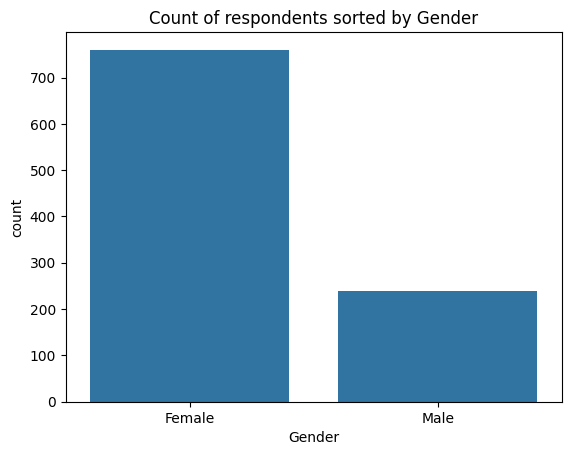

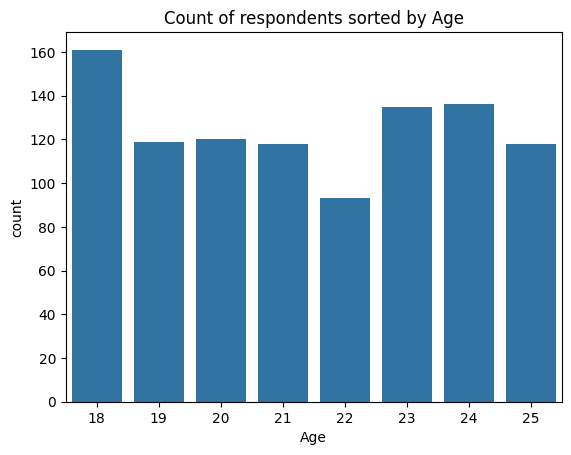

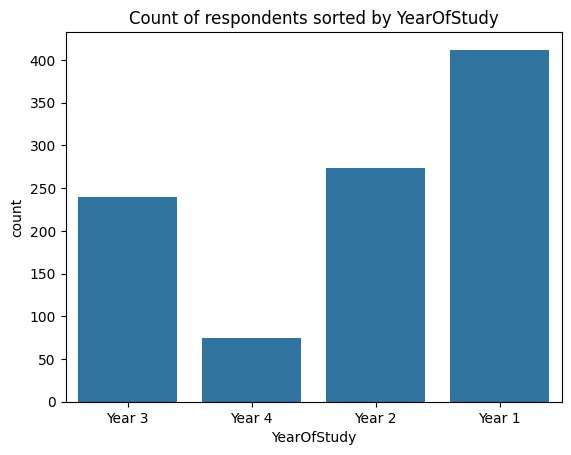

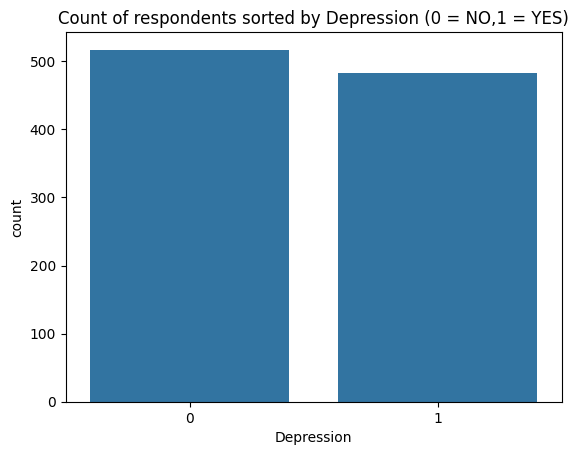

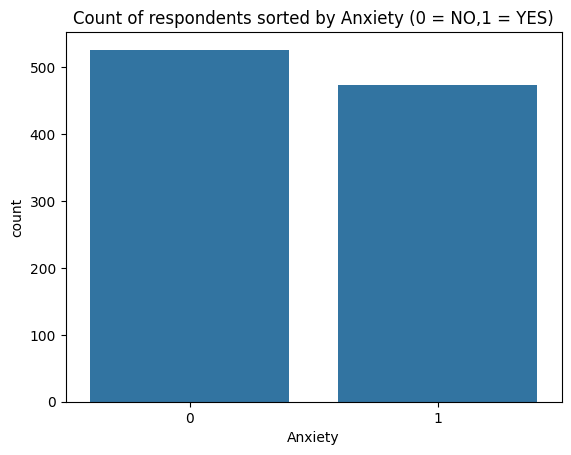

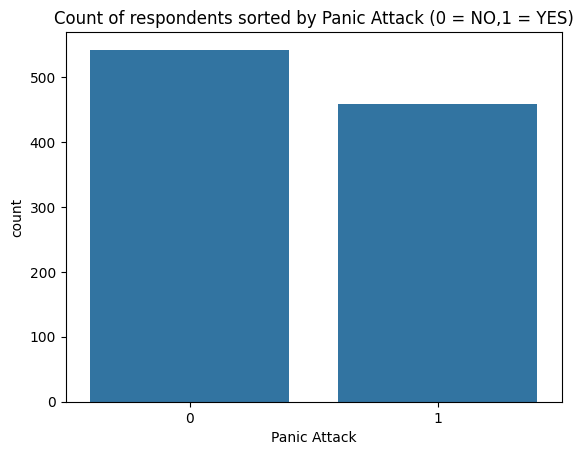

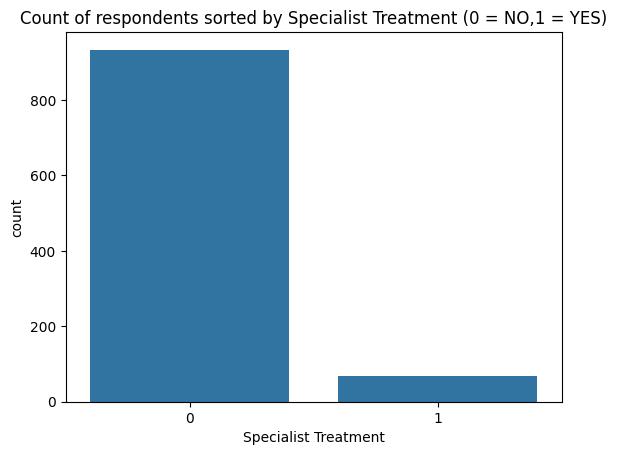

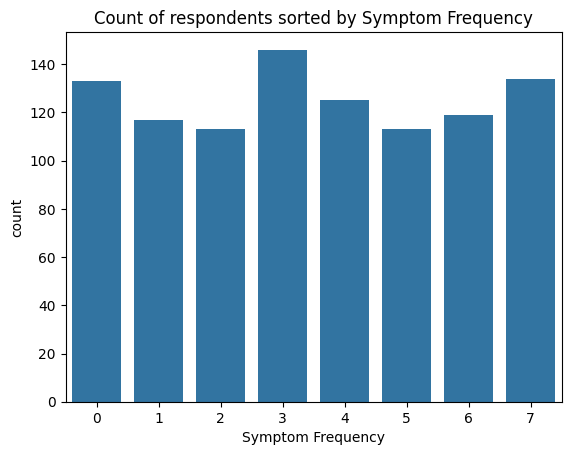

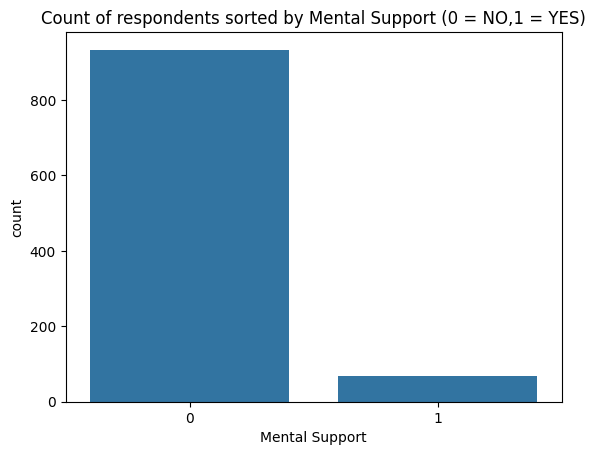

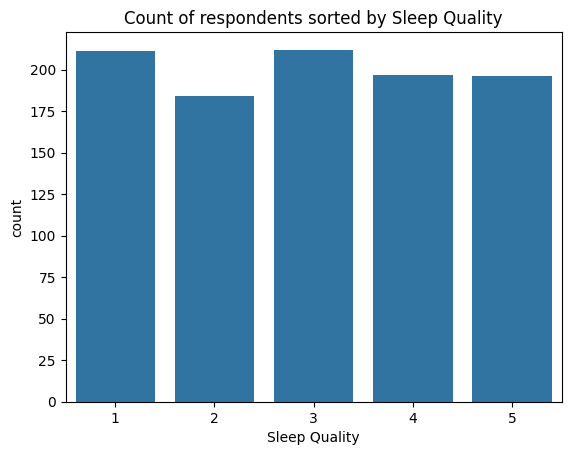

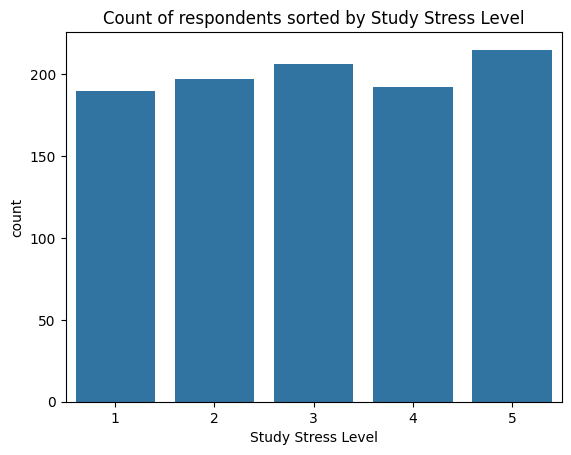

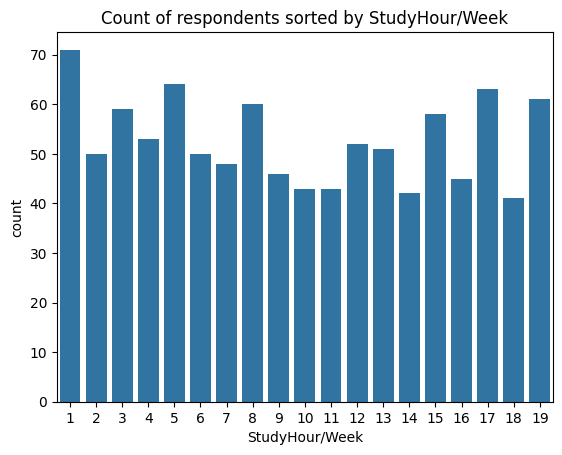

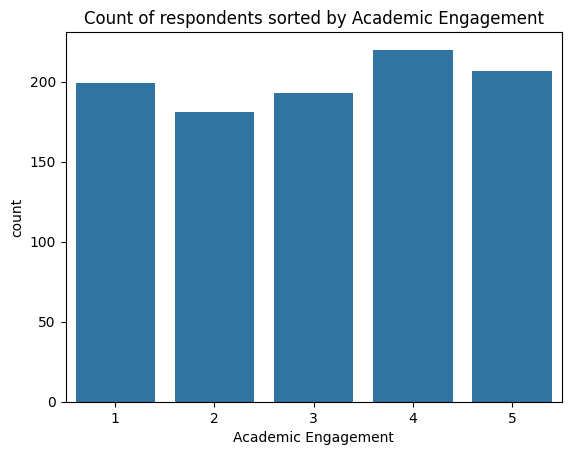

In [21]:
#Show count plots of numeric data
columns = df.columns.tolist()
columns_to_remove = ['Timestamp', 'CGPA','Course'] 
for col in columns_to_remove: 
    if col in columns:
        columns.remove(col)

for i in columns:
    sns.countplot(x=i,data=df)
    if(df[i].isin([0,1]).all()):
        plt.title(f"Count of respondents sorted by {i} (0 = NO,1 = YES)")
    else:
        plt.title(f"Count of respondents sorted by {i}")
    plt.show()

In [ ]:
#Count number of students courses, since using a bar graph is unsuitable
course_count = df['Course'].value_counts()
print (course_count)